In [1]:
import math
from collections import defaultdict
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [2]:
experiment_file_1 = OUTPUTS_DIR / "train_turbo_table_swarm_parity.json"
experiment_file_2 = OUTPUTS_DIR / "train_turbo_table_sgd_rerun_parity.json"





# experiment_files = [experiment_file_1, experiment_file_2, experiment_file_3, experiment_file_4]
experiment_files = [
    experiment_file_1, 
    experiment_file_2, 
]

In [22]:
with open(experiment_file_2, "r") as e:
    swarm_results = json.load(e)

sgd_results = []
for exp in swarm_results["data"]:
    results = exp["results"][-1]
    d = {}
    d["xe"] = results["xe__mean"]
    d["ber"] = results["ber__mean"]
    sgd_results.append(d)
        
sgd_results

[{'xe': 0.0018223514081910253, 'ber': 0.0005274999653920533},
 {'xe': 0.008812185702845454, 'ber': 0.0029603997827507555},
 {'xe': 0.012529182760044933, 'ber': 0.004152699769474566},
 {'xe': 0.0025303828297182913, 'ber': 0.0006894999532960355},
 {'xe': 0.014375136187300085, 'ber': 0.004937399690970778},
 {'xe': 0.0025860303139779717, 'ber': 0.0007485999434720725},
 {'xe': 1.0611900866031645, 'ber': 0.06401639692485332},
 {'xe': 0.023511229548603296, 'ber': 0.008498299354687332},
 {'xe': 0.01083415448665619, 'ber': 0.0034548997064121068},
 {'xe': 0.0074263049056753514, 'ber': 0.0024567998712882394},
 {'xe': 0.009225517231971025, 'ber': 0.003073899808805436},
 {'xe': 0.005452516162768007, 'ber': 0.0017393999150954187},
 {'xe': 0.0971673309803009, 'ber': 0.0198635988868773},
 {'xe': 0.007438250095583498, 'ber': 0.002530599827878177},
 {'xe': 0.011166595946997402, 'ber': 0.0038954997202381493},
 {'xe': 0.009368345793336633, 'ber': 0.0030136998160742224},
 {'xe': 0.02008911380544305, 'ber':

In [3]:
with open(experiment_file_1, "r") as e:
    swarm_results = json.load(e)

agent_results = defaultdict(list)
for res in swarm_results["data"][0]["results"]:
    if res["type"] == "validation":
        continue
    print(res.keys())
    for agent, agent_res in res["agents"].items():
        d = {}
        if "xe" in agent_res["results"]:
            d["xe"] = agent_res["results"]["xe"]
        if "ber" in agent_res["results"]:
            d["ber"] = agent_res["results"]["ber"]
        d["mass"] = agent_res["mass"]
        agent_results[agent].append(d)
        
agent_results

dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict_keys(['total_mass', 'num_agents', 'agents', 'type', 'step', 'total', 'time'])
dict

defaultdict(list,
            {'Agent 0': [{'xe': 0.0023624184541404247,
               'ber': 0.0005859999801032245,
               'mass': 0.009999999776482582},
              {'xe': 0.002419743686914444,
               'ber': 0.000615999975707382,
               'mass': 0.009999999776482582},
              {'mass': 0.009999999776482582},
              {'mass': 0.02192086912691593},
              {'mass': 0.021920865401625633},
              {'mass': 0.021920837461948395},
              {'mass': 0.021920837461948395},
              {'mass': 0.021920830011367798},
              {'mass': 0.021920816972851753},
              {'mass': 0.021920811384916306},
              {'mass': 0.02192079648375511},
              {'mass': 0.02192055620253086},
              {'mass': 0.02192055620253086},
              {'mass': 0.021920539438724518},
              {'mass': 0.02192043513059616},
              {'mass': 0.021920232102274895},
              {'mass': 0.02192005142569542},
              {'mas

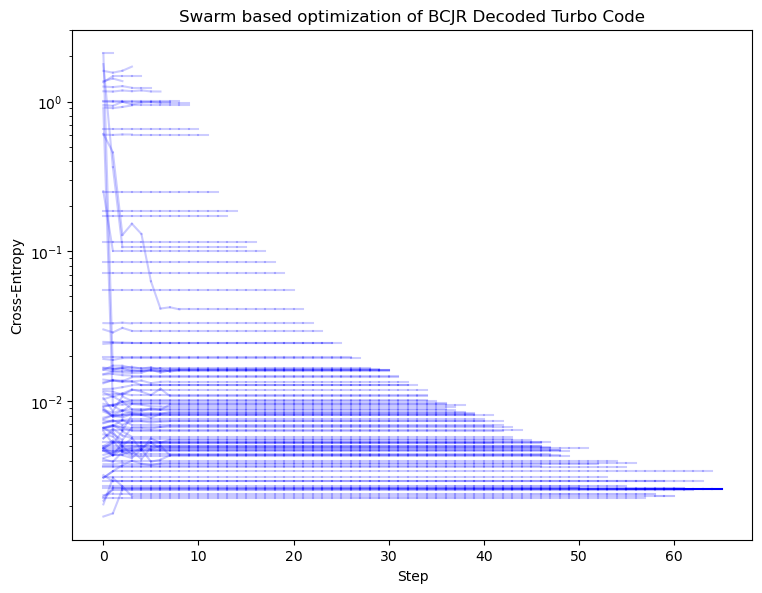

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def extend(lst, length):
    return lst + [lst[-1]] * (length - len(lst))

t = 0.25
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
for agent, data in agent_results.items():
    masses = [d["mass"] for d in data]
    bers = extend([d["ber"] for d in data if "ber" in d], len(masses))
    xes = extend([d["xe"] for d in data if "xe" in d], len(masses))
    for i in range(len(masses) - 1):
        ax.plot([i, i+1], [xes[i], xes[i+1]], 'b', alpha=(masses[i] + t)/ (1 + t))
    
ax.set_yscale('log')
ax.set_ylabel("Cross-Entropy")
ax.set_xlabel("Step")
ax.set_title("Swarm based optimization of BCJR Decoded Turbo Code")
fig.savefig("../figs/swarm_based_gradient_descent_bcjr.png")


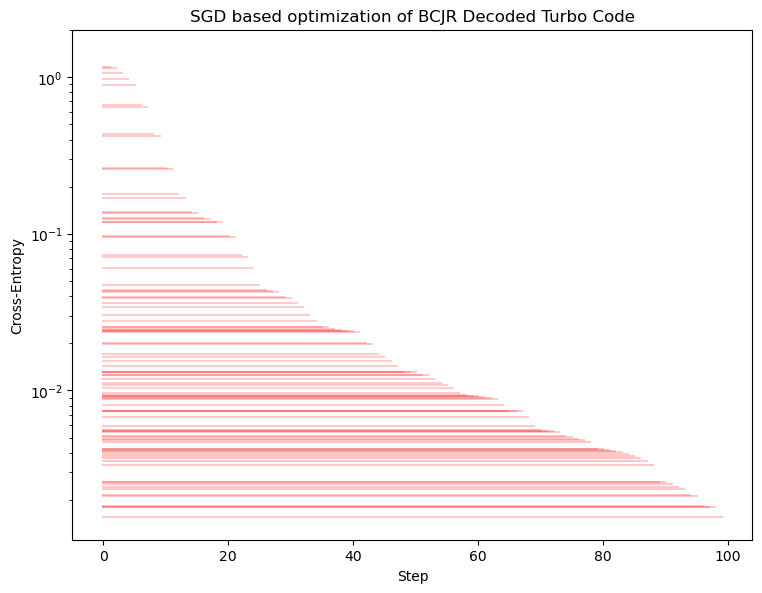

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def extend(lst, length):
    return lst + [lst[-1]] * (length - len(lst))

t = 0.25
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
sgd_results.sort(key=lambda x: x["xe"], reverse=True)
total_rank = len(sgd_results) * (len(sgd_results) - 1) / 2
for rank, result in enumerate(sgd_results):
    ax.plot(np.arange(rank + 1), [result["xe"]] * (rank + 1), 'r', alpha=(rank/total_rank + t)/(1 + t))
    
ax.set_yscale('log')
ax.set_ylabel("Cross-Entropy")
ax.set_xlabel("Step")
ax.set_title("SGD based optimization of BCJR Decoded Turbo Code")
fig.savefig("../figs/sgd_based_gradient_descent_bcjr.png")


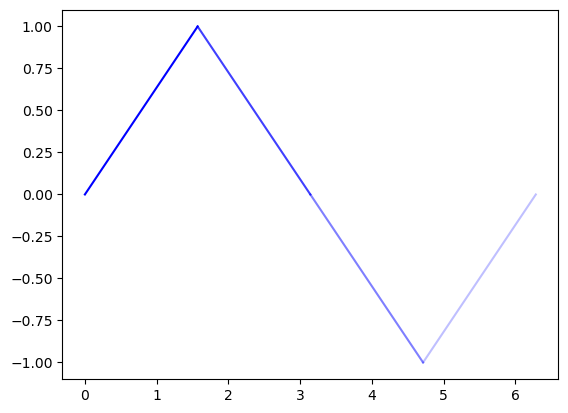

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 5)
y = np.sin(x)
alphas = np.linspace(1, 0, 5)
fig, ax = plt.subplots(1, 1)
for i in range(5):
    ax.plot(x[i:i+2], y[i:i+2], 'b', alpha=alphas[i])